# Game Users' Subscription Prediction Using KNN Classification

## Introduction

<span style="font-size: 15px">

### Background: </span>

A research group at UBC is hosting a Minecraft server and collecting data about the players and their play sessions to learn more about how people play video games. In their study, they formed two datasets, one with personal information about each participant and another with information on each individual session played. As part of the project they also created a newsletter that players could subscribe to for game-related information. Our group will be working with the dataset containing information about the players to answer a predictive question relating to the newsletter subscription status.

<span style="font-size: 15px">
    
### Questions: </span> 

**Can a user's subscription status to a game-related newsletter be predicted based on their age and playtime?**


### Dataset Description
`player.csv` : The player dataset has 7 columns and 196 rows. Each row represents a player who participated in the study and each column represents a variable used to characterize the participants. Therefore there were 7 variables in this dataset and 196 participants in this study.

Focusing on the `player.csv` dataset, the 7 variables are:

1. `experience`: a character type variable showing the previous playing experience of a participant (Beginner, Amateur, Regular, Veteran, and Pro)

2. `subscribe`: a logical type variable showing the subscription status of a participant (TRUE / FALSE)

3. `hashedEmail`: a character type variable showing the unique identifier of each participant

4. `hours_played`: a double type variable showing how many hours each player played

5. `name`: a character type variable showing the in game name of each participant

6. `gender`: a character variable to show the gender of each participant (Male, Female, Non-binary, Prefer not to say, Two-Spirited, Other, and Agender)

7. `Age`: a double type variable to show the age of each participant

## Methods & Results

### Preparing Data: 
### Step 1 :
Load all necessary libraries to explore data

In [1]:
#Load libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Step 2: 
Load dataset that will be studied and their dimensions

In [2]:
# Load datasets
players <- read_csv(url("https://raw.githubusercontent.com/linq060119/group-project/refs/heads/main/players.csv"))
head(players)

# Outputting the dimensions of the dataset
cat("\nThe dataset's dimensions:", dim(players))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17



The dataset's dimensions: 196 7

### Step 3:
Tidy the data by using the `filter` function to remove all NA values and remove all unused variables with the `select` function. Lastly use `mutate` to change logical type variable `subscribe` into a factor to make it easier to work with.

In [25]:
# This code filters out any missing values in the age column and gets rid of the columns we're not using in our analysis
# It also transforms the data type of the *subscribe* variable from logical to factor to make the data easier to work with
players_tidy <- players |>
        filter(Age != "NA") |>
        select(subscribe, played_hours, Age) |>
        mutate(subscribe = as.factor(subscribe))
head(players_tidy)        

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


### Step 4:
Make a exploratory visualization

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


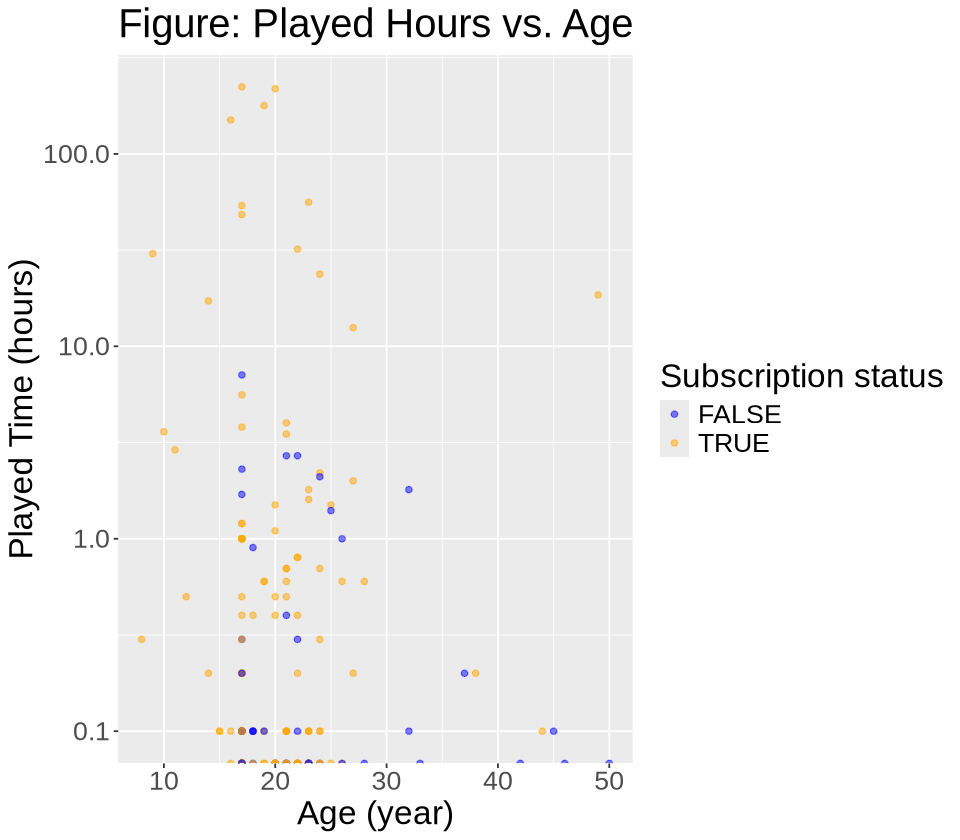

In [6]:
# Now that our data is tidy and ready we can make an exploratory visualization
options(repr.plot.width = 8, repr.plot.height = 7)
players_tidy_plot <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha=0.5) +
    labs(title = "Figure: Played Hours vs. Age",
        x = "Age (year)",
        y = "Played Time (hours)",
        color = "Subscription status")+
        scale_color_manual(values=c("blue","orange"))+
    theme(text = element_text(size = 20)) +
#Since data from hours_played takes the form of both very large values and very samll values, log scaling must be used
    scale_y_log10()

players_tidy_plot

### Step 5: 
Calculate the summary statistics 

In [7]:
# The next step is calculating our summary statistics
summary <- players_tidy |>
    summarize(mean_age = mean(Age),
              range_age = max(Age) - min(Age),
              mean_played_hours = mean(played_hours),
              range_played_hours = max(played_hours) - min(played_hours),
              subscribe_rate = nrow(filter(players_tidy,subscribe == "TRUE")) / nrow(players_tidy))

cat("\033[1mFigure 2\n")
summary

Figure 2


mean_age,range_age,mean_played_hours,range_played_hours,subscribe_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,42,5.904639,223.1,0.7319588


### Creating Classification: 
### Step 1: 
Splitting our data into the training set and testing set into a 75:25 ratio with `subscribe` as the `strata argument to ensure both sets include the right proportion of each observation

In [8]:
# Now that the preliminary work is done, we get into the bulk of our data analysis

# The first and very important step is splitting our data into a training set and a testing set
set.seed(2007)
players_split <- initial_split(players_tidy, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

### Step 2:
Create a recipe and perform a cross validation to tune our k value for the nearest neighbors. Finally plot a graph of K values vs Accuracy Estimate to find the most optimal k value. 

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Neighbors: 17.0000

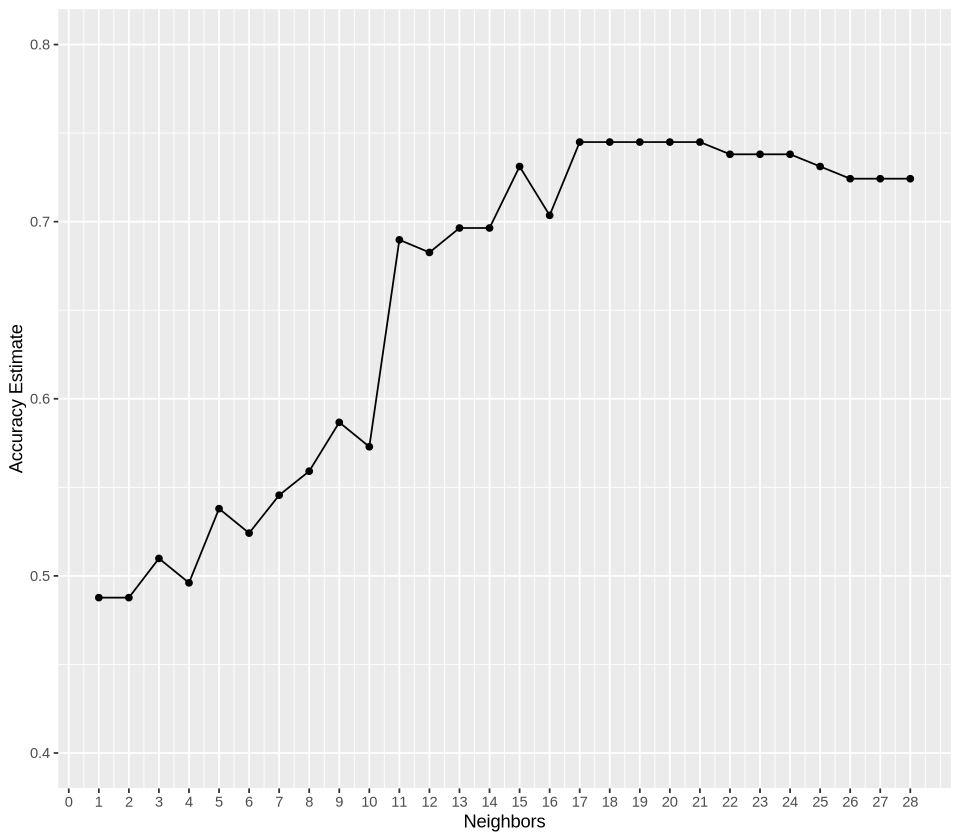

In [20]:
# Now that we have our training data we can make our recipe and start the process of 
# choosing how many neighbors to use in our model

players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>          
  set_mode("classification") 
knn_tune

k_vals <- tibble(neighbors = seq(from = 1, to = 28, by = 1))
                 
knn_results <- workflow() |>
  add_recipe(players_recipe) |>          
  add_model(knn_tune) |>               
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |> 
      filter(.metric == "accuracy")
k <- accuracies |>
    arrange(-mean)|>
    head(1)|>
    select(neighbors)|>
    pull()


accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 28, by = 1)) +  
      scale_y_continuous(limits = c(0.4, 0.8)) 
accuracy_versus_k
cat(sprintf("Neighbors: %.4f",
            k))

*Figure 3*

In [21]:
# From the analysis ,We found the value of neighbors that achieved the highest prediction accuracy in the training data and
# assigned this value to k.We will use this k to build the model


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
      set_engine("kknn") |>
      set_mode("classification")

players_fit <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_spec) |>
      fit(data = players_train)

# Now that we have our model, it's finally time to use it on our testing data

players_test_predictions <- predict(players_fit, new_data = players_test) |>
      bind_cols(players_test)

In [22]:
# With testing done, it's time to see how our model did. The following code blocks show the model's metrics

players_prediction_accuracy <- players_test_predictions |>
        metrics(truth = subscribe, estimate = .pred_class)
# No Answer - remove if you provide an answer
players_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.71428571
kap,binary,-0.03939394


In [23]:
players_mat <- players_test_predictions |> 
      conf_mat(truth = subscribe, estimate = .pred_class)
# No Answer - remove if you provide an answer
players_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    1
     TRUE     13   35

In [24]:
library(yardstick)
players_tibble <- tidy(players_mat)|>
    mutate(name=recode(name,
                       "cell_1_1"="TN",
                       "cell_2_1"="FP",
                       "cell_1_2"="FN",
                       "cell_2_2"="TP")) 

TN <- players_tibble |> filter(name=="TN")|>select(value)|>pull()  # True Negative
FP <- players_tibble |> filter(name=="FP")|>select(value)|>pull() # False Positive
FN <- players_tibble |> filter(name=="FN")|>select(value)|>pull() # False Negative
TP <- players_tibble |> filter(name=="TP")|>select(value)|>pull()  # True Positive
accuracy <- (TN + TP) / (TN + FP + FN + TP)
precision <- TP / (TP + FP)
recall <- TP / (TP + FN)

cat(sprintf("Accuracy: %.4f\nPrecision: %.4f\nRecall: %.4f",
            accuracy, precision, recall))

Accuracy: 0.7143
Precision: 0.7292
Recall: 0.9722

*Figure 4*

## Methods and Results

**Methods:**

Our first step after reading in the dataset was to get the data into the proper format for anaylsis. This included removing any missing values from the age column, selecting only the columns needed for the analysis, and changing the data type of the subscribe column to a factor to make it easier to work with. 

After that, we made our exploratory visualization (Fig. 1), plotting age against played hours (our predictors) and coloring by subscription status (our predicted class). Then we calculated all of our summary statistics (Fig. 2).  

Once all the preliminary steps were complete, we then moved into the data analysis, starting by splitting the data into a testing set and a training set.

Next we made our recipe, then used vfold to split the training data into 5 folds to use for cross validation to tune our k-values. After making the model and tuning our k-values, we collected and plotted the results (Fig. 3).

Using the results from tuning our k values, we chose the k value that achieve the highest prediction accuracy on training data in our final model. Then we fitted our final model and used it on the test data.

Our final step was to output the metrics for our model (Fig. 4). 

**Results:**